In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from sklearn import datasets

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
col = ['petal_length','petal_width','species']

In [6]:
df.loc[:,col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [7]:
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['temp'] = df['species'].map(species_to_num)

In [8]:
X = df.iloc[:,2:-2]
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [9]:
y = df['temp']
y.shape

(150,)

In [10]:
from sklearn.svm import SVC 

In [11]:
svm_model = SVC(random_state=0, C = 0.5, gamma = 'auto', kernel='linear')

In [12]:
svm_model.fit(X,y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
svm_model.predict([[6,1]])

array([2], dtype=int64)

In [14]:
Xv = X.values.reshape(-1,1)
h = .02
X_min, y_min = np.min(Xv), np.min(y)
X_max, y_max = np.max(Xv) + 1, np.max(y) + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))

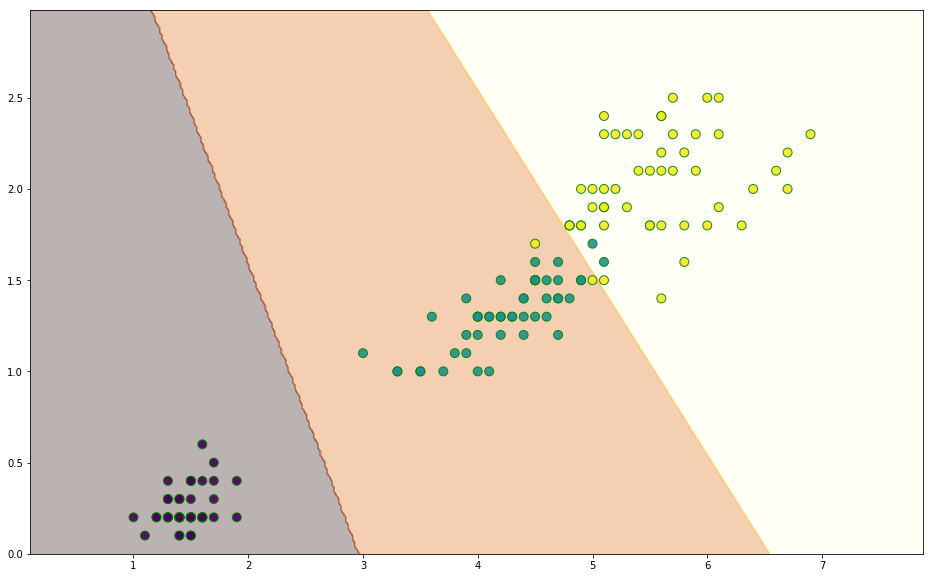

In [15]:
z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [16]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
 y.tail()

145    2
146    2
147    2
148    2
149    2
Name: temp, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [19]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [20]:
from sklearn.svm import SVC
svc = SVC(C = 1,kernel='linear')

In [21]:
svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
svc.score(X_train,y_train)

0.9629629629629629

# Cross validation Score within training sets

In [23]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc, X_train, y_train, cv = 3)
score

array([0.95652174, 0.95555556, 0.97727273])

In [24]:
score.mean(), score.std()

(0.9631166739862392, 0.010017609866713337)

In [25]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(svc, X_train, y_train, cv =3)

# Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[42,  0,  0],
       [ 0, 45,  2],
       [ 0,  3, 43]], dtype=int64)

# Precison and recall score

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, y_pred, average='macro'), recall_score(y_train, y_pred, average='macro'), f1_score(y_train, y_pred, average='macro')

(0.9643518518518519, 0.9640764724020969, 0.9641411220358588)

# Cross valdiation for test set

In [28]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc, X_test, y_test, cv = 3)
score

array([1.  , 1.  , 0.75])

In [29]:
score.mean(), score.std()

(0.9166666666666666, 0.11785113019775792)

In [30]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(svc, X_test, y_test, cv =3)

# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8, 0, 0],
       [0, 3, 0],
       [0, 1, 3]], dtype=int64)

# Precision recall score

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')

(0.9166666666666666, 0.9166666666666666, 0.9047619047619048)

***

# Polynomial kernel in SVM

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [236]:
from sklearn.svm import SVC
#svc = SVC(kernel='poly', C = 1, degree = 3, gamma='auto')
svc = SVC(kernel='rbf', C = 1, degree = 3, gamma=0.7)

In [237]:
svc.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [238]:
xv = X.values.reshape(-1,1)
h = .02
x_min,  x_max = np.min(xv), np.max(xv) + 1
y_min,  y_max = np.min(y), np.max(y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

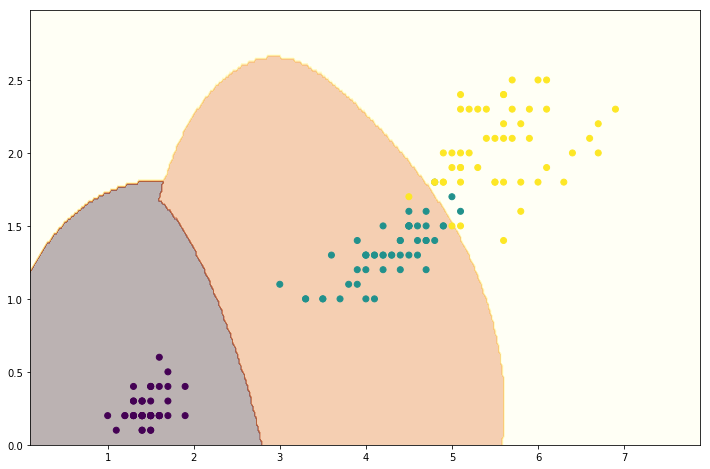

In [239]:
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(figsize=(12,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1], c = y)
plt.show();

In [240]:
svc.score(X_train,y_train)

0.9666666666666667

In [241]:
svc.score(X_test, y_test)

0.9666666666666667

# Cross validation  and precison recall score on training set

In [242]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc, X_train, y_train, cv = 3)
score

array([1. , 0.9, 1. ])

In [243]:
score.mean(), score.std()

(0.9666666666666667, 0.04714045207910316)

In [244]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(svc, X_train, y_train, cv =3)

In [245]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[10,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]], dtype=int64)

In [246]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, y_pred, average='macro'), recall_score(y_train, y_pred, average='macro'), f1_score(y_train, y_pred, average='macro')

(0.9743589743589745, 0.9583333333333334, 0.9644444444444445)

# Cross validation  and precison recall score on test set

In [247]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc, X_test, y_test, cv = 3)
score

array([1.        , 0.975     , 0.92307692])

In [248]:
score.mean(), score.std()

(0.966025641025641, 0.032038458973332795)

In [249]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(svc, X_test, y_test, cv =3)

In [250]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[40,  0,  0],
       [ 0, 41,  1],
       [ 0,  3, 35]], dtype=int64)

In [251]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')

(0.968013468013468, 0.9657477025898079, 0.9664781060129896)

# Grid Search

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [253]:
pipeline = Pipeline([('clf', SVC(kernel='rbf', C=1, gamma=0.1))]) 

In [254]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [255]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy',iid=False)

In [256]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    6.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [257]:
svm_grid_rbf.best_score_

0.9666666666666667

In [258]:
best = svm_grid_rbf.best_estimator_.get_params()
best

{'memory': None,
 'steps': [('clf', SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))],
 'clf': SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 0.5,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 0.5,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [259]:
for k in sorted(params.keys()):
    print("{0:} = {1:.4f}".format(k,best[k]))

clf__C = 0.5000
clf__gamma = 0.5000


In [260]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [261]:
confusion_matrix(y_test, y_test_pred)

array([[40,  0,  0],
       [ 0, 38,  4],
       [ 0,  1, 37]], dtype=int64)

In [262]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9601
Recall Score: 		 0.9583
F1 Score: 		 0.9584
